<a href="https://colab.research.google.com/github/savioratharv/Compute_tasks/blob/main/Compute_ML_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## Importing the libraries

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [49]:
dataset = pd.read_csv('/content/Compute_ML_Task.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:, -1].values

In [50]:
print(X)

[[ 5  1  1 ...  3  1  1]
 [ 5  4  4 ...  3  2  1]
 [ 3  1  1 ...  3  1  1]
 ...
 [ 5 10 10 ...  8 10  2]
 [ 4  8  6 ... 10  6  1]
 [ 4  8  8 ... 10  4  1]]


In [51]:
print(y)

[2 2 2 2 2 4 2 2 2 2 2 2 4 2 4 4 2 2 4 2 4 4 2 2 4 2 2 2 2 2 2 4 2 2 2 4 2
 4 4 4 4 4 4 2 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 2 4 2 4 4 2 2 4 2 4 4 2
 2 2 2 2 2 2 2 2 4 4 4 4 2 2 2 2 2 2 2 2 2 2 4 4 4 4 2 4 4 4 4 4 2 4 2 4 4
 4 2 2 2 4 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 4 2 2 4 2 4
 4 2 2 4 2 2 4 4 2 2 2 2 4 4 2 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 4 2 4 4 4 2 4
 4 2 2 2 2 2 2 2 2 4 4 2 2 2 4 4 2 2 2 4 4 2 4 4 4 2 2 4 2 2 4 4 4 4 2 4 4
 2 4 4 4 2 4 2 4 4 4 4 2 2 2 2 2 2 4 4 2 2 4 2 4 4 4 2 2 2 2 4 4 4 4 4 2 4
 4 4 2 4 2 4 4 2 2 2 2 4 2 2 4 4 4 4 4 2 4 4 2 2 4 4 2 2 4 4 2 4 2 4 4 2 2
 4 2 2 2 4 2 2 4 4 2 2 4 2 4 2 2 4 2 4 4 4 2 2 4 4 2 4 2 2 4 4 2 2 2 4 2 2
 2 4 4 2 2 2 4 2 2 4 4 4 4 4 4 2 2 2 2 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2
 2 2 4 2 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 4 2 4 2 4 2 2 2 2 4
 2 2 2 4 2 4 2 2 2 2 2 2 2 4 4 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 4 2 4 4 4 2
 2 2 2 2 2 2 4 4 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 4 2 2 2 4 4 4 2 4 2 4 2 2
 2 2 2 2 2 2 2 2 2 2 4 2 

##Creating a pair plot of the all the relevant columns to compare individual features with each other and depicting the Class by hue

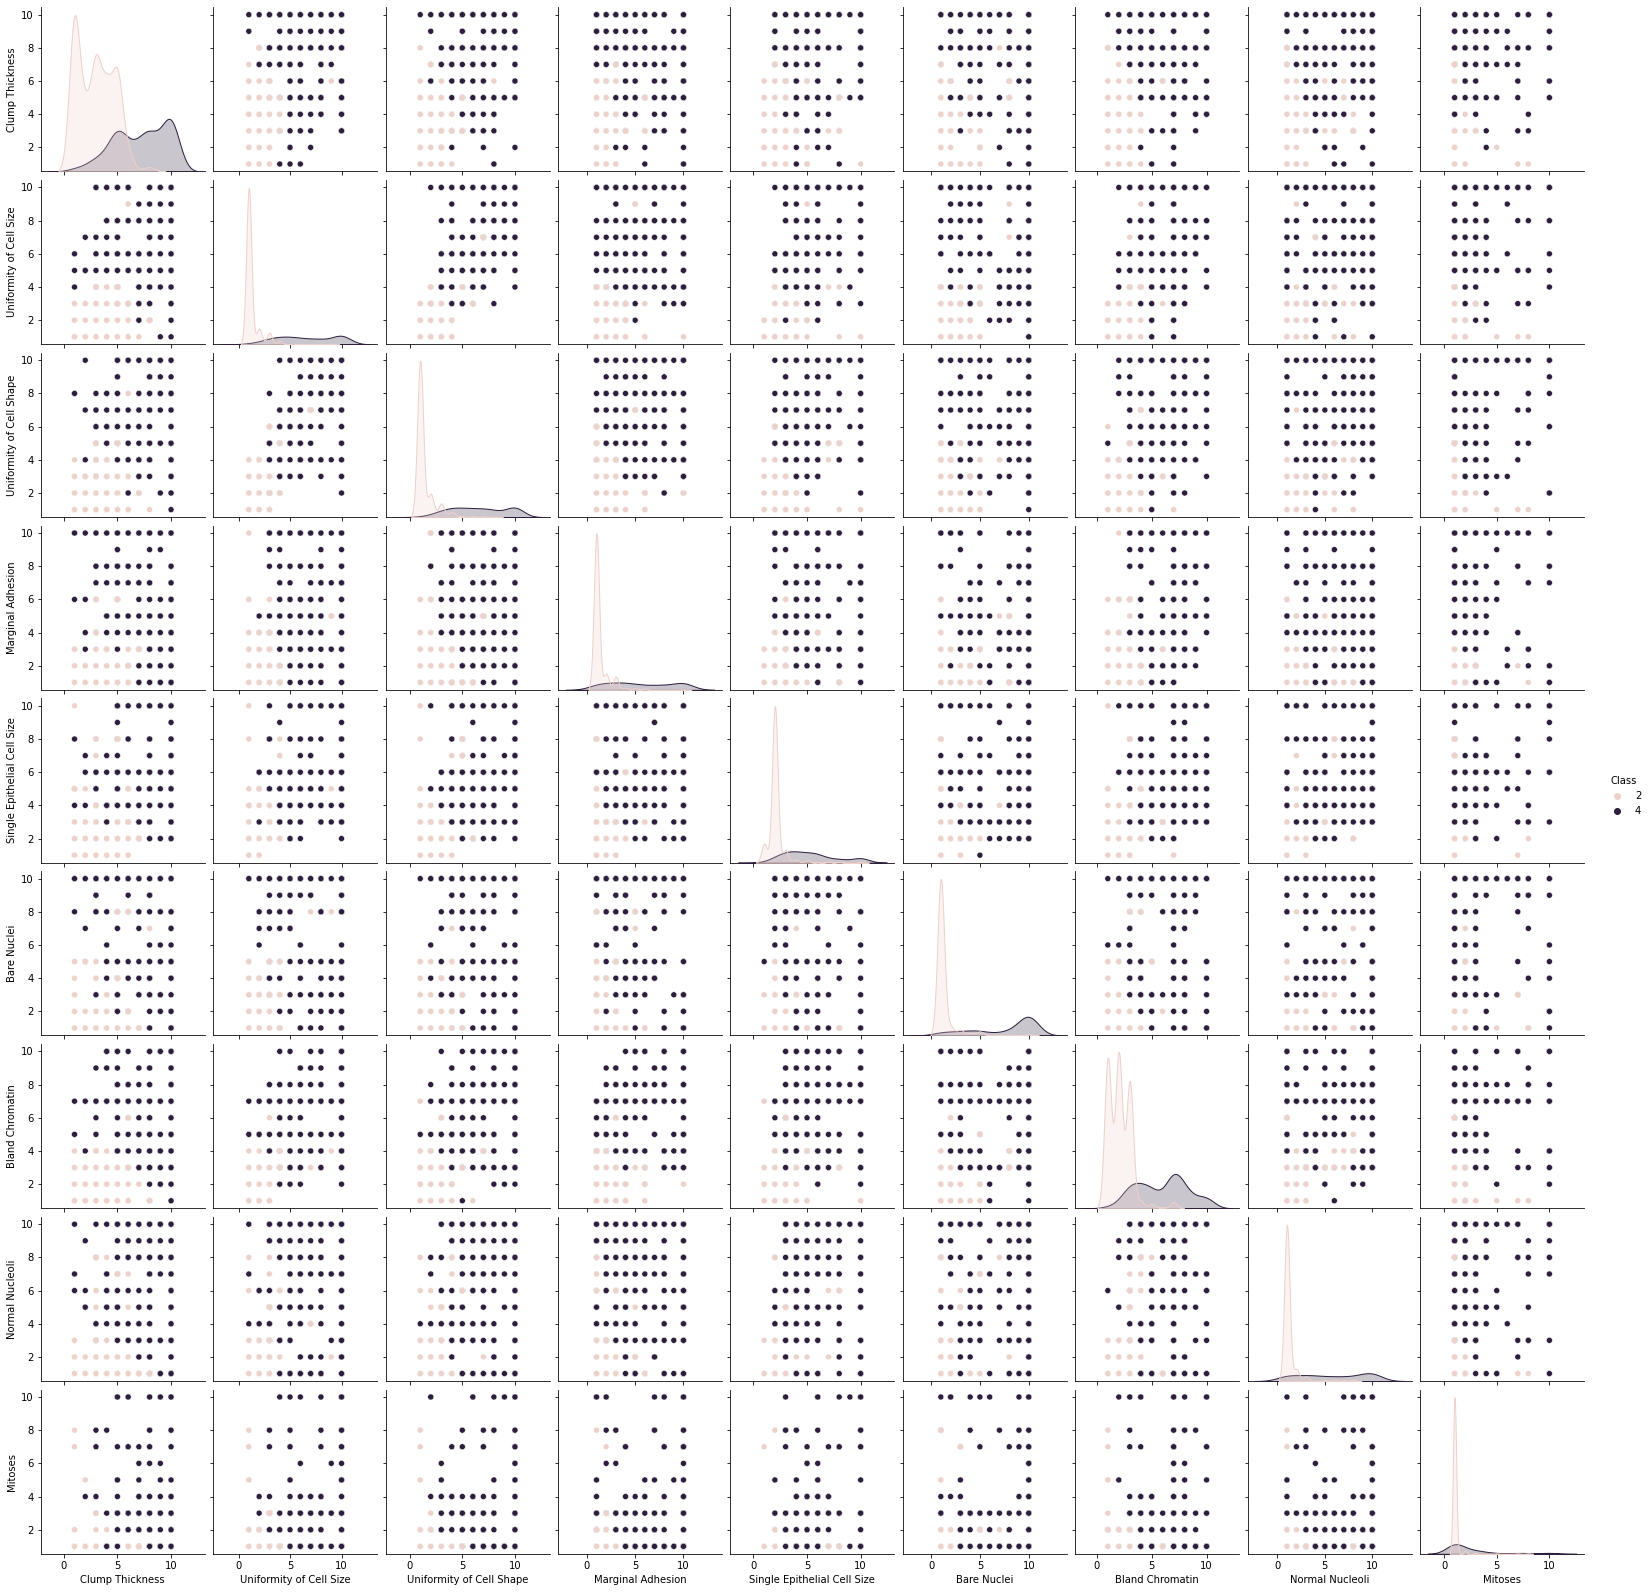

In [69]:
import seaborn as sns
sns.pairplot(dataset.iloc[:,1:],hue='Class')

This pairplot can be of invaluable importance to a medical professional trying to find relations between different attributes like Clump Thickness, Uniformity Cell Size etc. He can compare what is the acceptable value of each individual attribute with respect to some other attribute such that the cancer is benign. A medical professional can use these graphs to analyse the patient report even if he/she is not a trained cancer specialist. For example, taking the case of clump thickness and mitoses, one can see that the acceptable value for clump thickness is somewhere below 5 and the acceptable value for mitoses is somewhere below 4 on an average.

##The following is a heatmap showing correlation between various attributes

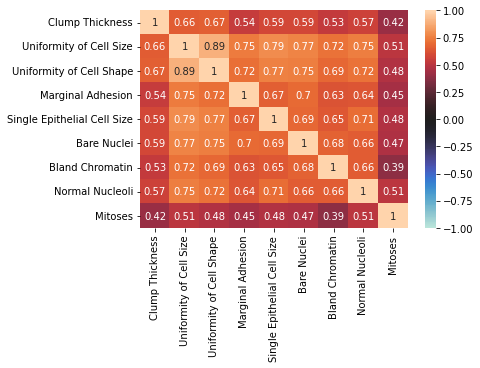

In [71]:
corr = dataset.iloc[:,1:-1].corr('spearman')
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True)

Correlation is basically a measure that expresses the extent to which two variables are linearly related. That is, correlation tells how much of a role do two individual attributes together play in defining the result. This way the medical professional can view in a convenient way which features contribute the most towards the final decision to decide if the cancer is malignant or benign and then use the previous pair plot to coompare those individual attributes.

##Using a countplot to visualise how many people in the dataset have a benign or malignant cancer

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


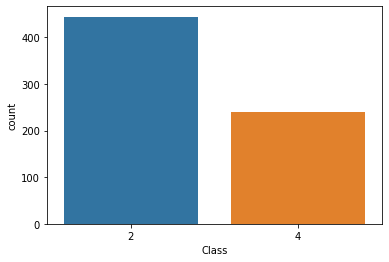

In [66]:
sns.countplot(dataset['Class'],label='Count')

Depcited above, is a simple analysis of how many people in the dataset have a benign or malignant tumour. If the dataset is an unbiased sample taken randomly out of the total population of reports, we might infer from the above graph the ratio between the benign and malignant cancer patients out of the total number of people who go for a cancer report.

## Splitting the dataset into the Training set and Test set

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [56]:
print(X_train)

[[10  1  1 ...  5  4  1]
 [ 1  1  1 ...  3  1  1]
 [ 5  1  1 ...  3  1  1]
 ...
 [ 1  1  1 ...  1  1  1]
 [ 3  1  1 ...  2  1  1]
 [10  9  7 ...  7  7  1]]


In [57]:
print(y_train)

[4 2 2 2 4 2 2 2 2 4 2 4 2 4 4 2 2 2 2 4 4 2 4 4 4 4 4 4 2 2 2 2 2 2 4 4 4
 2 2 2 4 2 2 4 4 2 4 2 2 4 4 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 4 4 2 4 2 2 2
 4 2 2 2 2 4 4 2 2 4 4 2 2 4 4 2 4 2 4 4 2 2 2 4 2 4 2 4 2 2 2 2 2 4 2 2 4
 2 2 4 2 2 2 2 2 4 2 2 4 2 4 2 2 4 4 4 2 2 2 2 2 2 4 4 2 2 2 2 2 2 2 4 2 2
 4 2 2 2 2 2 2 2 4 2 2 2 4 4 2 4 2 2 2 4 2 2 2 4 4 2 4 2 2 4 2 2 2 2 2 2 2
 4 4 4 4 2 4 2 4 2 4 4 4 2 2 4 2 2 2 2 4 4 2 2 2 4 2 2 4 2 2 2 2 4 4 2 2 2
 2 2 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 4 4 4 4 2 2 4 2 4 2 4 2 2 2 2 4 2 4 2 2
 2 2 4 2 2 4 2 2 2 2 2 2 2 4 2 4 2 2 2 4 2 2 2 2 2 4 2 2 2 2 4 2 2 4 2 2 2
 2 4 4 2 2 2 2 4 2 2 4 2 2 2 2 4 4 2 4 2 4 2 2 2 4 4 4 2 2 2 2 2 2 2 2 4 4
 2 2 2 2 2 2 2 4 4 2 2 2 2 4 4 4 2 4 2 4 2 2 2 2 2 4 2 4 4 2 2 2 2 2 2 2 4
 2 2 2 4 2 2 4 4 4 2 4 4 4 2 2 2 4 2 4 2 2 4 2 4 4 4 2 2 2 4 2 4 4 4 2 2 2
 4 2 4 2 2 2 2 4 4 2 2 2 4 4 2 2 4 2 2 2 4 4 2 2 2 4 2 2 2 4 2 4 2 2 4 2 2
 2 2 4 4 2 2 4 4 2 2 4 4 4 2 2 4 2 2 2 2 2 4 2 4 4 2 2 2 2 4 2 2 2 2 4 2 4
 2 4 2 2 4 2 2 2 2 4 2 2 

In [58]:
print(X_test)

[[ 1  1  1 ...  1  1  1]
 [ 3  1  1 ...  2  1  1]
 [ 5  5  5 ...  4  3  1]
 ...
 [ 4  1  1 ...  1  1  1]
 [ 4 10  4 ...  9 10  1]
 [ 2  1  1 ...  2  1  1]]


In [59]:
print(y_test)

[2 2 4 4 2 2 2 4 2 2 4 2 4 2 2 2 4 4 4 2 2 2 4 2 4 4 2 2 2 4 2 4 4 2 2 2 4
 4 2 4 2 2 2 2 2 2 2 4 2 2 4 2 4 2 2 2 4 2 2 4 2 2 2 2 2 2 2 2 4 4 2 2 2 2
 2 2 4 2 2 2 4 2 4 2 2 4 2 2 4 2 4 2 4 4 4 2 4 4 4 2 2 2 4 4 2 2 4 4 2 2 4
 2 2 4 2 2 2 4 2 2 2 4 2 2 4 4 2 4 2 4 2 2 4 2 2 4 2]


## Feature Scaling

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [61]:
print(X_train)

[[ 1.98839518 -0.69781134 -0.74152574 ...  0.61907387  0.34532102
  -0.33863738]
 [-1.22468404 -0.69781134 -0.74152574 ... -0.18860673 -0.62157783
  -0.33863738]
 [ 0.20335117 -0.69781134 -0.74152574 ... -0.18860673 -0.62157783
  -0.33863738]
 ...
 [-1.22468404 -0.69781134 -0.74152574 ... -0.99628733 -0.62157783
  -0.33863738]
 [-0.51066644 -0.69781134 -0.74152574 ... -0.59244703 -0.62157783
  -0.33863738]
 [ 1.98839518  1.90512627  1.27779124 ...  1.42675446  1.31221987
  -0.33863738]]


In [62]:
print(X_test)

[[-1.22468404 -0.69781134 -0.74152574 ... -0.99628733 -0.62157783
  -0.33863738]
 [-0.51066644 -0.69781134 -0.74152574 ... -0.59244703 -0.62157783
  -0.33863738]
 [ 0.20335117  0.60365746  0.60468558 ...  0.21523357  0.0230214
  -0.33863738]
 ...
 [-0.15365763 -0.69781134 -0.74152574 ... -0.99628733 -0.62157783
  -0.33863738]
 [-0.15365763  2.23049348  0.26813275 ...  2.23443506  2.27911872
  -0.33863738]
 [-0.86767524 -0.69781134 -0.74152574 ... -0.59244703 -0.62157783
  -0.33863738]]


## Training the Logistic Regression model on the Training set

In [63]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting the Test set results

In [64]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 4]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]]


## Making the Confusion Matrix

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[84  3]
 [ 3 47]]


0.9562043795620438

PS: Reducing the testing data to 0.1 yields an accuracy score of 0.9855072463768116